In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd


In [3]:
cancer = pd.read_csv('data.csv')

In [4]:
def encode_Diagnosis(x):
  if x == "B":
    return 0
  elif x == "M":
    return 1
cancer["encode_Diagnosis"] = cancer.apply(lambda x: encode_Diagnosis(x["Diagnosis"]),axis=1)

In [5]:
y = cancer[['encode_Diagnosis']]
x = cancer.drop(columns=['Diagnosis','encode_Diagnosis','ID',], axis=1)

In [6]:
cv = KFold(n_splits=10, random_state=49, shuffle=True)

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)


In [20]:
accuracy_scores = cross_val_score(lr, x, y.values.ravel(), scoring='accuracy',cv=cv,).mean()
precision_scores = cross_val_score(lr, x, y.values.ravel(), scoring='precision',cv=cv,).mean()
recall_scores = cross_val_score(lr, x, y.values.ravel(), scoring='recall',cv=cv,).mean()
f1_scores = cross_val_score(lr, x, y.values.ravel(), scoring='f1',cv=cv,).mean()


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [21]:
print("DecisionTree Accuracy:",accuracy_scores)
print("DecisionTree Precision:",precision_scores)
print("DecisionTree Recall:",recall_scores)
print("DecisionTree F1-score:",f1_scores)


DecisionTree Accuracy: 0.9508458646616542
DecisionTree Precision: 0.9484570707070705
DecisionTree Recall: 0.9189094257546943
DecisionTree F1-score: 0.9322010832000786


In [22]:
predictions = cross_val_predict(lr,x,y.values.ravel(),cv=cv)
y_score = cross_val_predict(lr, x, y.values.ravel(), cv=cv, method='predict')

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

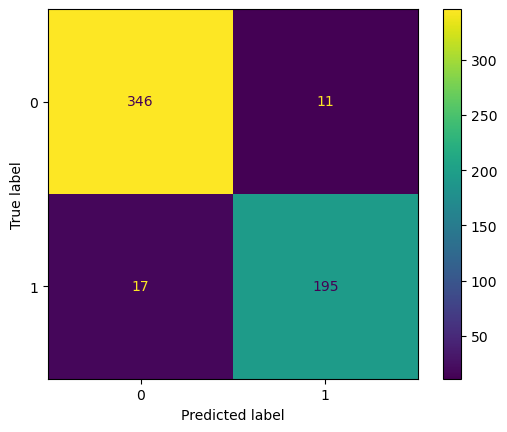

In [23]:
cm = confusion_matrix(y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [12]:
false_positive_rate, true_positive_rate, threshold1 = roc_curve(y, y_score)
print('roc_auc_score  Logistic regression: ', roc_auc_score(y, y_score))

roc_auc_score  Logistic regression:  0.9444994979123725


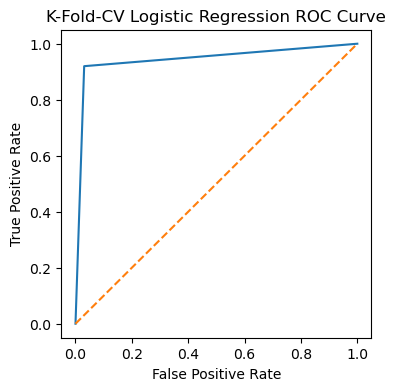

In [13]:
plt.subplots(1, figsize=(4,4))
plt.title('K-Fold-CV Logistic Regression ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()